# P2. Getting started with Scikit-Learn
Learn basic function of Scikit-Learn. 

In [33]:
# Imports.
import sklearn
assert sklearn.__version__ >= '0.20'

import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import cv2

### Fetch the Data (MNIST)
The `sklearn.datasets` package is able to download datasets from the repository using `fetch_openml`. 

In [2]:
from sklearn.datasets import fetch_openml

data = fetch_openml('mnist_784', version=1)
data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [22]:
X, y = data['data'], data['target']
print(X.shape, y.shape)

(70000, 784) (70000,)


In [23]:
X = X.to_numpy()

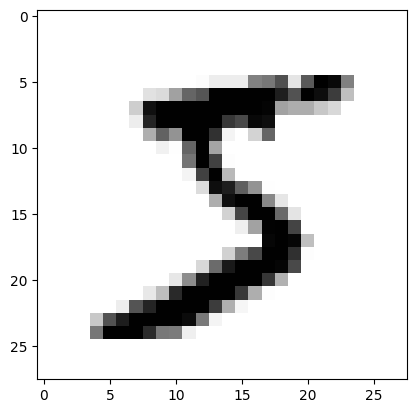

In [24]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary)
plt.show()

In [25]:
y[0]  # What the picture displays, the target output, eg. '5'. 

'5'

Note that the label is a string. Most ML algorithms expect numbers, so let's cast y to an integer: 

In [26]:
y = y.astype(np.uint8)

### Normalize the data

In [28]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train[0].shape

(784,)

In [29]:
x_train = X_train.astype('float') / 255
x_test = X_test.astype('float') / 255

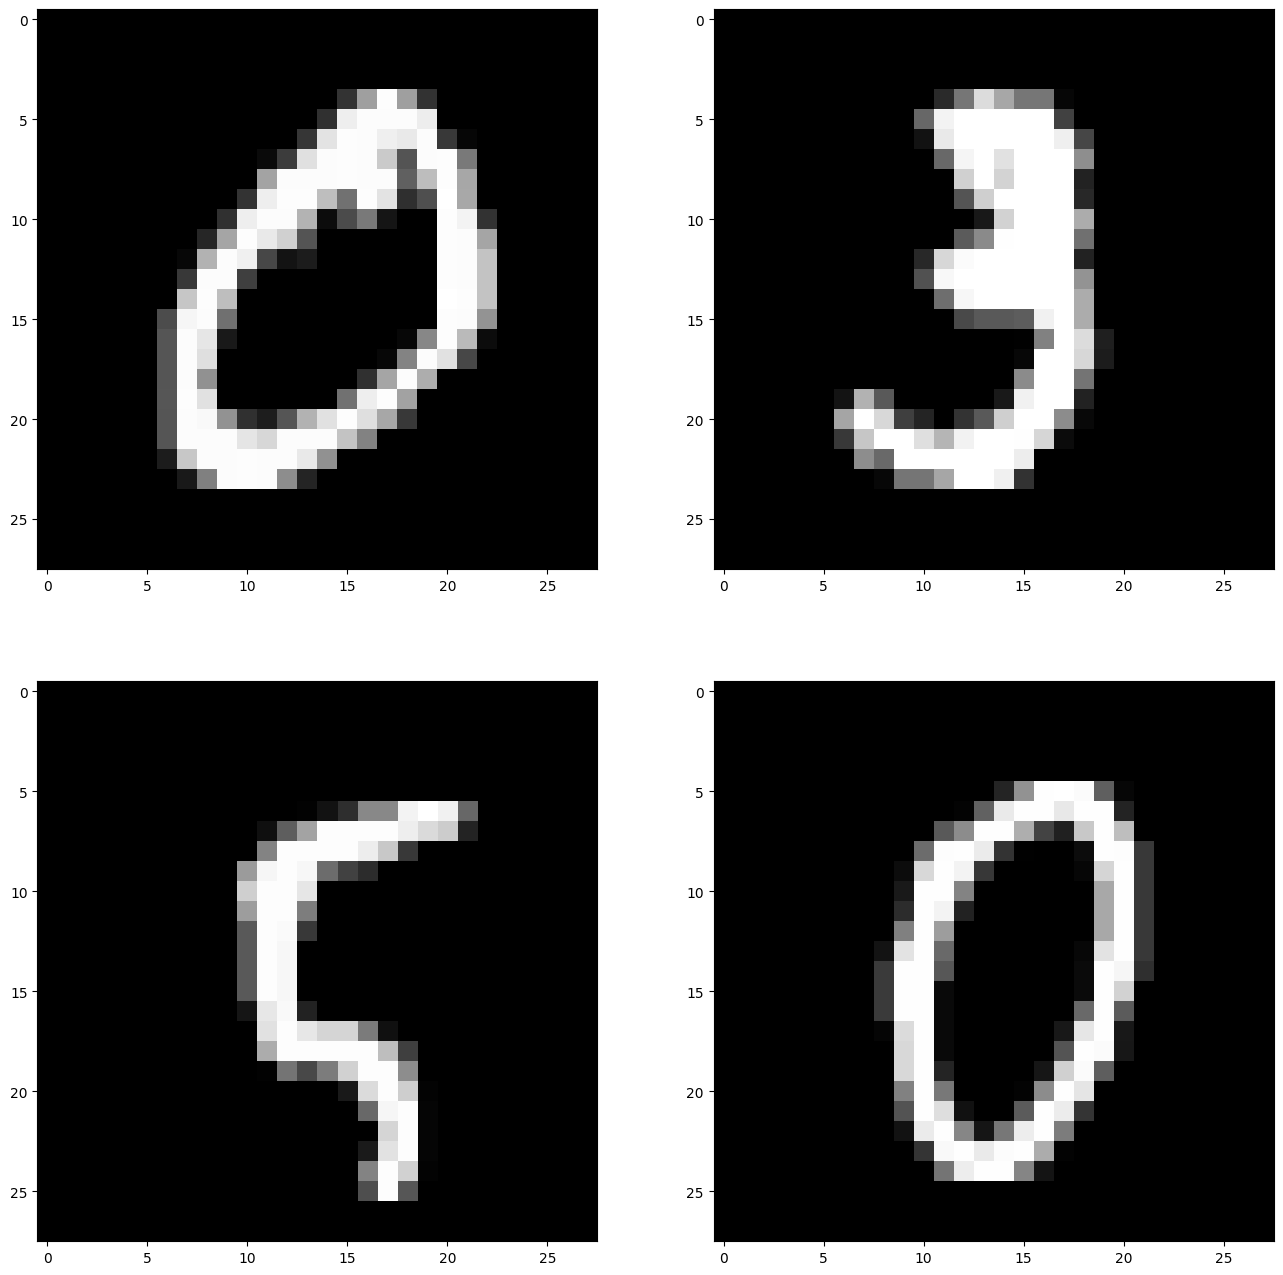

In [30]:
f, axarr = plt.subplots(2,2,figsize=(16, 16))

axarr[0,0].imshow(x_train[1].reshape(28, 28),cmap='gist_gray')
axarr[0,1].imshow(x_train[10].reshape(28, 28),cmap='gist_gray')
axarr[1,0].imshow(x_train[100].reshape(28, 28),cmap='gist_gray')
axarr[1,1].imshow(x_train[1000].reshape(28, 28),cmap='gist_gray')

In [31]:
print(y_train[1])
print(y_train[10])
print(y_train[100])
print(y_train[1000])

0
3
5
0


### Apply resize to all the dataset
There are two options that you can apply, For loops or using libraries to apply a function over your data.

In [34]:
x_train_sm = np.apply_along_axis(
    func1d=lambda img: cv2.resize(img.reshape(28, 28), dsize=(16, 16)),
    axis=1, arr=x_train).reshape(-1, 16*16)

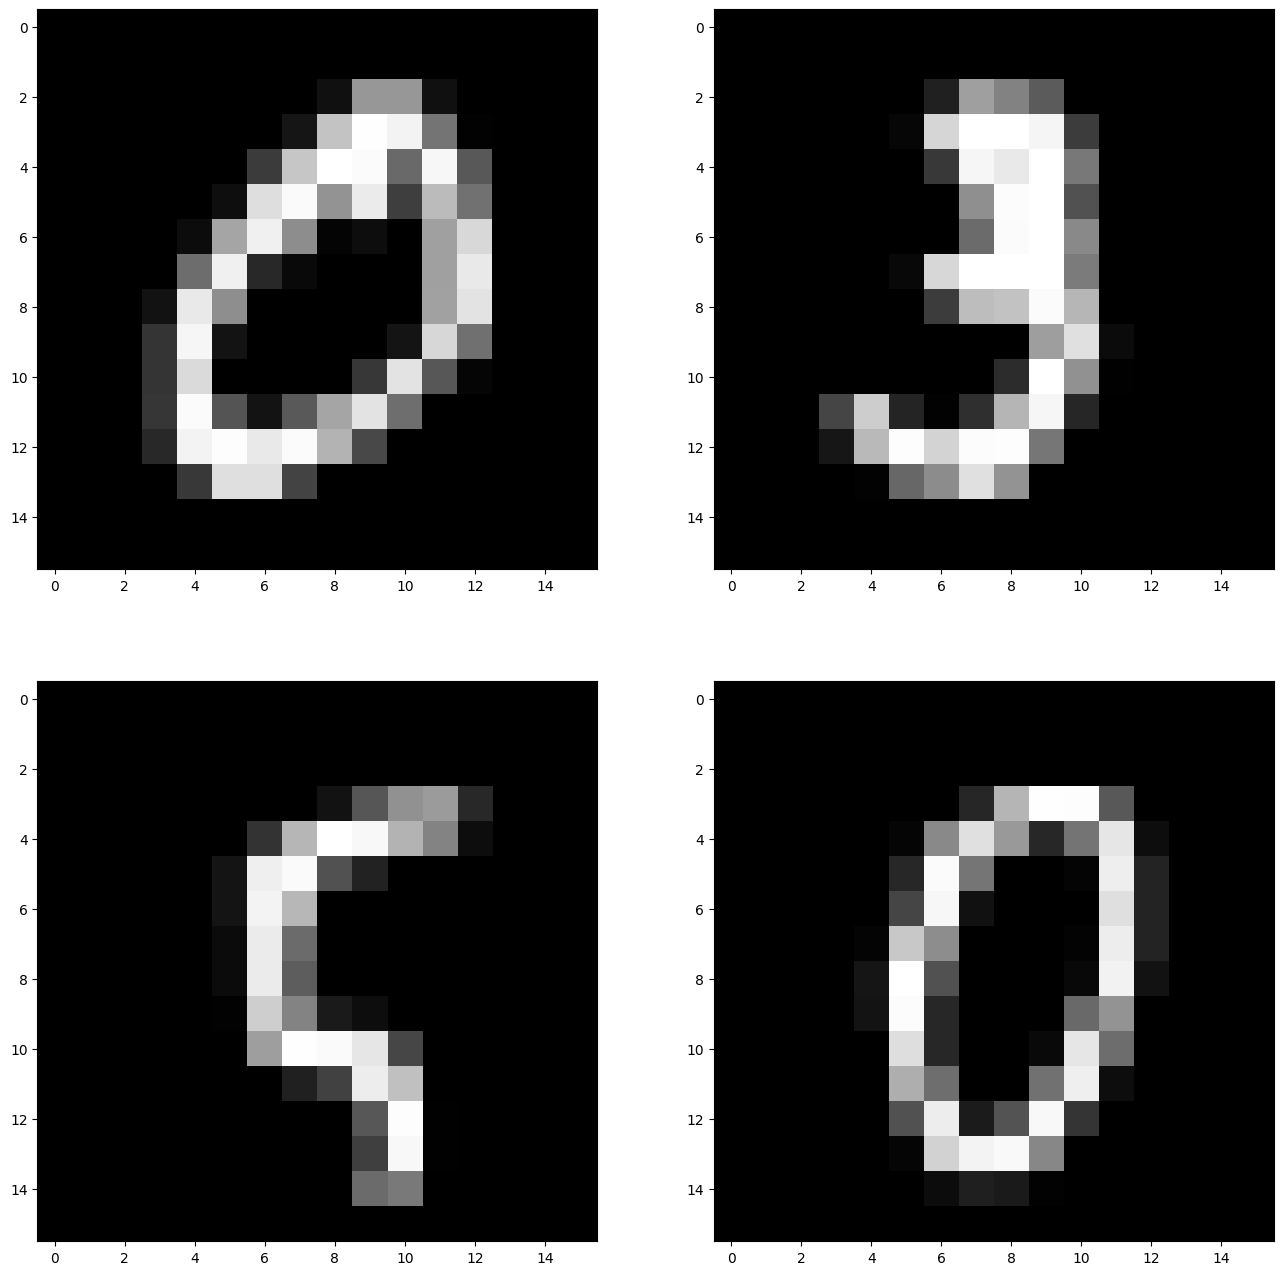

In [35]:
f, axarr = plt.subplots(2,2,figsize=(16, 16))
axarr[0,0].imshow(x_train_sm[1].reshape(16,16),cmap='gist_gray')
axarr[0,1].imshow(x_train_sm[10].reshape(16,16),cmap='gist_gray')
axarr[1,0].imshow(x_train_sm[100].reshape(16,16),cmap='gist_gray')
axarr[1,1].imshow(x_train_sm[1000].reshape(16,16),cmap='gist_gray')

In [37]:
# For SDG, use the original version, not the downsampled one. 
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# Let's find if a digit is 5 or not
y_train_5 = (y_train == 5)  # This is true for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

### Stochastic Gradient Descent

In [38]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [39]:
sgd_clf.predict([some_digit])  # Let's see what the classifier predicts for our 5. 

array([ True])